<a href="https://colab.research.google.com/github/shivamgiri007/AI_Repository/blob/main/machine_learning/Linear_regression/Linear_Regression_with_Ridge_Lasso_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from sklearn.datasets import fetch_california_housing
cfhousing = fetch_california_housing()

In [59]:
cfhousing.data.shape

(20640, 8)

In [60]:
cfhousing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [61]:
data = pd.DataFrame(cfhousing.data, columns=cfhousing.feature_names)

In [62]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [63]:
cfhousing.target.shape

(20640,)

In [64]:
cfhousing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [65]:
data['price'] = cfhousing.target

In [66]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [67]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [69]:
x = data.drop('price' , axis=1)
y = data['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

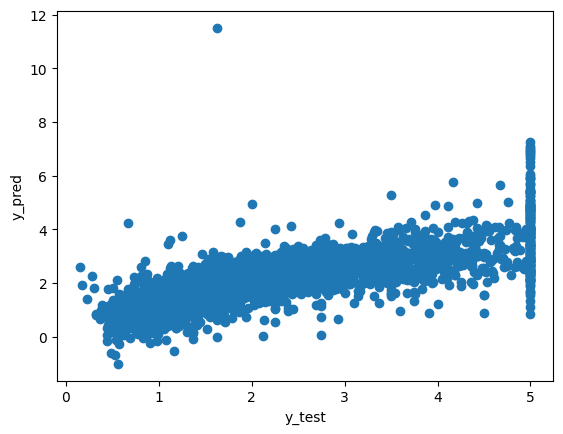

In [72]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute error:", mae)

Mean Squared Error: 0.5558915986952444
Mean Absolute error: 0.5332001304956553


In [74]:
#Applying pca for feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [75]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [76]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.25313826 0.48717008 0.64634182 0.77611076 0.90158281 0.98374798
 0.99408959 1.        ]


In [77]:
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 6


# Refit PCA with selected components

In [78]:
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Train a Linear Regression model

In [79]:
model=LinearRegression()
model.fit(x_train_pca, y_train)

#make prediction
y_pred=model.predict(x_test_pca)

In [80]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute error:", mae)

Mean Squared Error: 0.6713632829708936
Mean Absolute error: 0.6119930525394647


In [83]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.4876688925986027


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge , Lasso


In [87]:
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']  # Solvers
}
lasso_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

In [91]:
ridge = Ridge()
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid,
                                 scoring='neg_mean_squared_error',
                                 cv=5, verbose=2, n_jobs=-1)
ridge_grid_search.fit(x_train_pca, y_train)

# Perform Grid Search for Lasso Regression
lasso = Lasso(max_iter=10000)  # Increase max_iter for convergence
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=lasso_param_grid,
                                 scoring='neg_mean_squared_error',
                                 cv=5, verbose=2, n_jobs=-1)
lasso_grid_search.fit(x_train_pca, y_train)

# Get best estimators
best_ridge = ridge_grid_search.best_estimator_
best_lasso = lasso_grid_search.best_estimator_

# Evaluate Ridge Regression
y_pred_ridge = best_ridge.predict(x_test_pca)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Evaluate Lasso Regression
y_pred_lasso = best_lasso.predict(x_test_pca)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [92]:
print("Best Parameters for Ridge:", ridge_grid_search.best_params_)
print("Ridge Regression - MSE:", ridge_mse)
print("Ridge Regression - R2 Score:", ridge_r2)

print("\nBest Parameters for Lasso:", lasso_grid_search.best_params_)
print("Lasso Regression - MSE:", lasso_mse)
print("Lasso Regression - R2 Score:", lasso_r2)

Best Parameters for Ridge: {'alpha': 10, 'solver': 'saga'}
Ridge Regression - MSE: 0.6713500573148063
Ridge Regression - R2 Score: 0.4876789853683463

Best Parameters for Lasso: {'alpha': 0.01}
Lasso Regression - MSE: 0.6721128986095354
Lasso Regression - R2 Score: 0.4870968455117092
